In [1012]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [1013]:
yolo = cv2.dnn.readNet("./yolov3-tiny.weights","./yolov3-tiny.cfg")

In [1014]:
classes = []
with open("./coco.names", 'r') as f:
  classes = f.read().splitlines()

In [1015]:
len(classes)

80

In [1016]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [1017]:
img = cv2.imread("/content/image.jpg")

blob = cv2.dnn.blobFromImage(img, 1/255,(320,320), swapRB=True, crop=False)

In [1018]:
blob.shape

(1, 3, 320, 320)

In [1019]:
yolo.setInput(blob)
height, width = blob.shape[2:4]

In [1020]:
output_layes_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layes_name)

In [1021]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * img.shape[1])
            center_y = int(detection[1] * img.shape[0])
            w = int(detection[2] * img.shape[1])
            h = int(detection[3] * img.shape[0])
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)




In [1022]:
len(boxes)

2

In [1023]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes),3))


In [1024]:
# loop over each detection and draw the bounding box and label
for i in range(len(boxes)):
    # extract the bounding box coordinates
    x1, y1, x2, y2 = boxes[i]
    # draw the bounding box rectangle
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    # construct the label text
    label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
    # draw the label rectangle
    cv2.rectangle(img, (x1, y1 - 20), (x2, y1), (0, 255, 0), -1)
    # draw the label text
    cv2.putText(img, label, (x1 , y1), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)


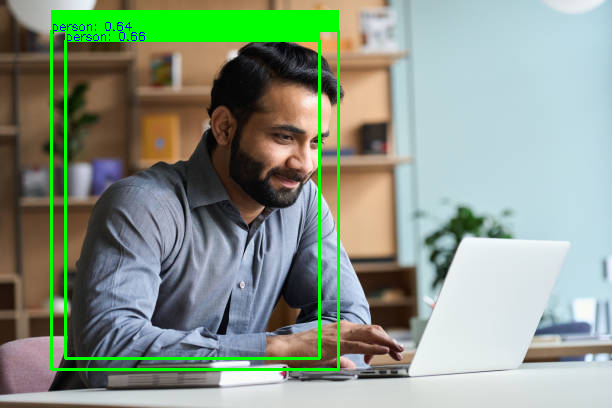

In [1025]:
cv2_imshow(img)